# Multiscale Centrality

## Example notebook

This notebook shows an example implementation of multiscale centrality

In [9]:
import networkx as nx
import sys as sys
import os as os
import pickle as pickle
import yaml as yaml

from multiscale_centrality import Multiscale_Centrality



Define graph as networkx object

In [13]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)


Define hyperparameters for multiscale centrality

In [14]:
# random walk parameters
normalization_tpe = 'combinatorial'  # combinatorial laplacian
rw_tpe = 'continuous'  # continuous random walk
rev = False # undirected
t_min = -1.3  # maximum time (in spectral gap units)
t_max = 0.5    # maximum time (in spectral gap units)
n_t = 1000  # number of timesteps 

#plotting parameters
n_plot    = 50 # number of plots when scanning the time horizon

#number of cpu to use for parallel computations
n_processes = 2

Define Multiscale centrality object

In [15]:
# define msc object
mc = Multiscale_Centrality(G, pos, t_min = t_min, t_max = t_max, n_t = n_t, n_processes = n_processes, normalization_tpe = normalization_tpe, rw_tpe = rw_tpe, rev = rev)


Spectral gap =  0.4685252267013894


Compute multiscale centrality

In [16]:
mc.compute_multiscale_centralities()


100%|██████████| 1000/1000 [00:05<00:00, 189.26it/s]


Multiscale centrality as an array: node x time

In [21]:
mc.multiscale.shape

(34, 1000)

Compare multiscale centrality against other standard measures

In [22]:
mc.compare_centralities(n_compare = n_t, n_top = 2, n_force = 100)


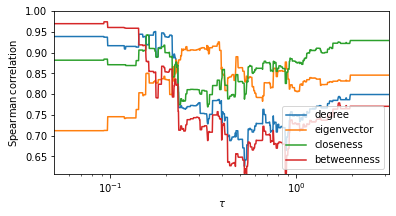

In [23]:
mc.figsize=(6,3)
mc.plot_comparisons_spearman()
 
